In [1]:
import tensorflow as tf

# Path to your dataset
dataset_path = 'C:/Users/Pruthviraj/Documents/Animal_data'

# Load dataset and split into training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Print the class names
print("Classes found:", train_ds.class_names)


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow


   ---------------------------------------- 0.0/375.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/375.9 MB 2.9 MB/s eta 0:02:11
   ---------------------------------------- 0.1/375.9 MB 1.7 MB/s eta 0:03:41
   ---------------------------------------- 0.2/375.9 MB 1.9 MB/s eta 0:03:20
   ---------------------------------------- 0.3/375.9 MB 1.7 MB/s eta 0:03:38
   ---------------------------------------- 0.4/375.9 MB 1.7 MB/s eta 0:03:38
   ---------------------------------------- 0.5/375.9 MB 1.7 MB/s eta 0:03:37
   ---------------------------------------- 0.5/375.9 MB 1.7 MB/s eta 0:03:41
   ---------------------------------------- 0.6/375.9 MB 1.7 MB/s eta 0:03:40
   ---------------------------------------- 0.7/375.9 MB 1.7 MB/s eta 0:03:46
   ---------------------------------------- 0.8/375.9 MB 1.7 MB/s eta 0:03:45
   ---------------------------------------- 0.8/375.9 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.9/375.9 MB 1.7 MB/s eta 0

In [3]:
import tensorflow as tf

# Path to your dataset
dataset_path = 'C:/Users/Pruthviraj/Documents/Animal_data'

# Load dataset and split into training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Print the class names
print("Classes found:", train_ds.class_names)


NotFoundError: Could not find directory C:/Users/Pruthviraj/Documents/Animal_data

In [ ]:
# Normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models

# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax')  # Output layer
])

model.summary()


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(5)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()


In [ ]:
# Save the model
model.save("animal_cnn_model.h5")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = train_ds.class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence}%)")
    plt.axis('off')
    plt.show()
    
# Example usage:
# predict_image('C:/Users/Pruthviraj/Documents/Animal_data/dog/dog1.jpg')


In [ ]:
import os

# Example: predict first 3 images from 'cat' folder
cat_folder = '/mnt/data/Animal_data/cat'

for fname in os.listdir(cat_folder)[:3]:
    img_path = os.path.join(cat_folder, fname)
    print(f"Predicting: {fname}")
    predict_image(img_path)


In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
# Save class names to a file (optional)
with open("class_names.txt", "w") as f:
    for cls in train_ds.class_names:
        f.write(cls + "\n")


In [ ]:
# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("animal_model.tflite", "wb") as f:
    f.write(tflite_model)


In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    predictions = model.predict(img_array)
    predicted_class = train_ds.class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence}%)")
    plt.axis('off')
    plt.show()


In [5]:
import os

# List images in the dog class
folder_path = '/mnt/data/Animal_data/dog'
images = os.listdir(folder_path)
print(images)



FileNotFoundError: [WinError 3] The system cannot find the path specified: '/mnt/data/Animal_data/dog'

In [6]:
import os

# Correct local folder path
folder_path = 'C:/Users/Pruthviraj/Documents/Animal_data/dog'

# List images inside the 'dog' folder
images = os.listdir(folder_path)
print(images)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Pruthviraj/Documents/Animal_data/dog'

In [7]:
import os

base_path = 'C:/Users/Pruthviraj/Documents/Animal_data'
print("Folders/files inside Animal_data:")
print(os.listdir(base_path))


Folders/files inside Animal_data:


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Pruthviraj/Documents/Animal_data'

In [8]:
import os

base_path = 'C:/Users/pruth/Documents/Animal_data'
print("Folders/files inside Animal_data:")
print(os.listdir(base_path))


Folders/files inside Animal_data:
['Bear', 'bear_1.jpg', 'Bear_10.jpg', 'Bear_10_1.jpg', 'Bear_10_2.jpg', 'Bear_10_3.jpg', 'Bear_11.jpeg', 'Bear_11_1.jpg', 'Bear_11_2.jpg', 'Bear_11_3.jpg', 'Bear_12.jpeg', 'Bear_12_1.jpg', 'Bear_12_2.jpg', 'Bear_12_3.jpg', 'Bear_13.jpeg', 'Bear_13_1.jpg', 'Bear_13_2.jpg', 'Bear_13_3.jpg', 'Bear_13_4.jpg', 'Bear_14.jpeg', 'Bear_14_1.jpg', 'Bear_14_2.jpg', 'Bear_14_3.jpg', 'Bear_15.jpeg', 'Bear_15_1.jpg', 'Bear_15_2.jpg', 'Bear_15_3.jpg', 'Bear_16.jpeg', 'Bear_16_1.jpg', 'Bear_16_2.jpg', 'Bear_16_3.jpg', 'Bear_17.jpeg', 'Bear_17_1.jpg', 'Bear_17_2.jpg', 'Bear_17_3.jpg', 'Bear_18.jpeg', 'Bear_18_1.jpg', 'Bear_18_2.jpg', 'Bear_18_3.jpg', 'Bear_18_4.jpg', 'Bear_19.jpeg', 'Bear_19_1.jpg', 'Bear_19_2.jpg', 'Bear_19_3.jpg', 'bear_1_1.jpg', 'bear_1_2.jpg', 'bear_1_3.jpg', 'bear_1_4.jpg', 'Bear_2.jpeg', 'Bear_20.jpeg', 'Bear_20_1.jpg', 'Bear_20_2.jpg', 'Bear_20_3.jpg', 'Bear_20_4.jpg', 'Bear_21.jpeg', 'Bear_21_1.jpg', 'Bear_21_2.jpg', 'Bear_21_3.jpg', 'Bear_22.j

In [9]:
C:/Users/pruth/Documents/Animal_data/Bear_10.jpg


SyntaxError: invalid syntax (3561155732.py, line 1)

In [10]:
predict_image("C:/Users/pruth/Documents/Animal_data/Bear_10.jpg")


NameError: name 'model' is not defined

In [11]:
from tensorflow.keras.models import load_model

model = load_model("animal_classifier.h5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'animal_classifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [14]:
# Load dataset
data_dir = "C:/Users/pruth/Documents/Animal_data"
img_size = (180, 180)
batch_size = 16

train_ds_raw = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds_raw = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# ✅ Save class names here BEFORE prefetching
class_names = train_ds_raw.class_names

# Now apply prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_raw.cache().prefetch(buffer_size=AUTOTUNE)



Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [15]:
model.save("animal_classifier.h5")


NameError: name 'model' is not defined

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

# Load dataset
dataset_path = "C:/Users/pruth/Documents/Animal_data"
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_ds.class_names
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # Output layer with 15 classes
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Save the trained model
model.save("animal_classifier.h5")
print("✅ Model saved as 'animal_classifier.h5'")


Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.1182 - loss: 2.7258 - val_accuracy: 0.2706 - val_loss: 2.3133
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.3530 - loss: 2.0220 - val_accuracy: 0.4278 - val_loss: 1.9504
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.5590 - loss: 1.5120 - val_accuracy: 0.5464 - val_loss: 1.6328
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.7380 - loss: 0.9500 - val_accuracy: 0.5541 - val_loss: 1.7318
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.8683 - loss: 0.5924 - val_accuracy: 0.6727 - val_loss: 1.4437
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9

✅ Model saved as 'animal_classifier.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


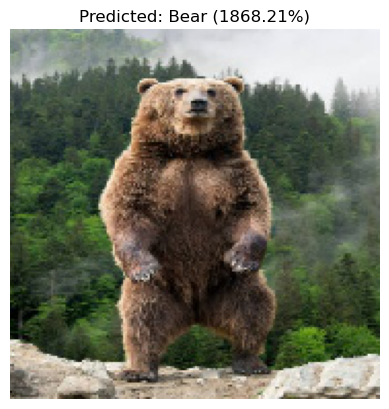

('Bear', 1868.21)

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("animal_classifier.h5")

# Class names (must match the order used during training)
class_names = ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant',
               'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    # Display result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence}%)")
    plt.show()

    return predicted_class, confidence

# Example usage
predict_image("C:/Users/pruth/Documents/Animal_data/Bear_10.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


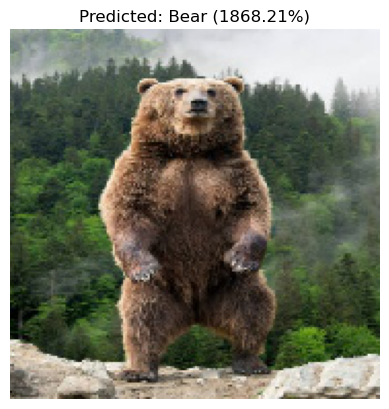

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


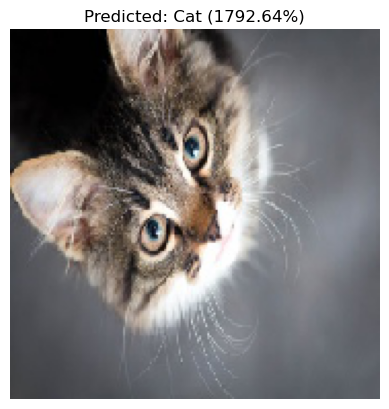

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/pruth/Documents/Animal_data/Dog_05.jpg'

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("animal_classifier.h5")

# Class names in the same order as during training
class_names = ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant',
               'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    # Show image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence}%)")
    plt.show()

    return predicted_class, confidence

# ✅ Predict different animals
predict_image("C:/Users/pruth/Documents/Animal_data/Bear_10.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Cat_12.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Dog_05.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Lion_03.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Elephant_08.jpg")


In [19]:
import os

folder_path = "C:/Users/pruth/Documents/Animal_data/"
files = os.listdir(folder_path)

# Print only image files
for file in files:
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        print(file)


bear_1.jpg
Bear_10.jpg
Bear_10_1.jpg
Bear_10_2.jpg
Bear_10_3.jpg
Bear_11.jpeg
Bear_11_1.jpg
Bear_11_2.jpg
Bear_11_3.jpg
Bear_12.jpeg
Bear_12_1.jpg
Bear_12_2.jpg
Bear_12_3.jpg
Bear_13.jpeg
Bear_13_1.jpg
Bear_13_2.jpg
Bear_13_3.jpg
Bear_13_4.jpg
Bear_14.jpeg
Bear_14_1.jpg
Bear_14_2.jpg
Bear_14_3.jpg
Bear_15.jpeg
Bear_15_1.jpg
Bear_15_2.jpg
Bear_15_3.jpg
Bear_16.jpeg
Bear_16_1.jpg
Bear_16_2.jpg
Bear_16_3.jpg
Bear_17.jpeg
Bear_17_1.jpg
Bear_17_2.jpg
Bear_17_3.jpg
Bear_18.jpeg
Bear_18_1.jpg
Bear_18_2.jpg
Bear_18_3.jpg
Bear_18_4.jpg
Bear_19.jpeg
Bear_19_1.jpg
Bear_19_2.jpg
Bear_19_3.jpg
bear_1_1.jpg
bear_1_2.jpg
bear_1_3.jpg
bear_1_4.jpg
Bear_2.jpeg
Bear_20.jpeg
Bear_20_1.jpg
Bear_20_2.jpg
Bear_20_3.jpg
Bear_20_4.jpg
Bear_21.jpeg
Bear_21_1.jpg
Bear_21_2.jpg
Bear_21_3.jpg
Bear_22.jpeg
Bear_22_1.jpg
Bear_22_2.jpg
Bear_22_3.jpg
Bear_23.jpeg
Bear_23_1.jpg
Bear_23_2.jpg
Bear_23_3.jpg
Bear_24.jpeg
Bear_24_1.jpg
Bear_24_2.jpg
Bear_24_3.jpg
Bear_25.jpeg
Bear_25_1.jpg
Bear_25_2.jpg
Bear_26.jpeg
Bear_

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load your model
model = tf.keras.models.load_model("animal_classifier.h5")

# Define the class names in the same order used during training
class_names = ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']

# Function to make prediction
def predict_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(180, 180))
        img_array = image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        predicted_label = class_names[np.argmax(score)]
        confidence = 100 * np.max(score)

        print(f"✅ Image: {os.path.basename(img_path)}")
        print(f"Predicted: {predicted_label} ({confidence:.2f}% confidence)\n")

    except FileNotFoundError:
        print(f"❌ File not found: {img_path}")

# ✅ Use real, existing files for prediction
predict_image("C:/Users/pruth/Documents/Animal_data/Bear_10.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Bird_10.jpeg")
predict_image("C:/Users/pruth/Documents/Animal_data/Cat_12.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Cat_22.jpg")
predict_image("C:/Users/pruth/Documents/Animal_data/Bear_3.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
✅ Image: Bear_10.jpg
Predicted: Bear (99.89% confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
✅ Image: Bird_10.jpeg
Predicted: Bird (100.00% confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
✅ Image: Cat_12.jpg
Predicted: Cat (78.63% confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
✅ Image: Cat_22.jpg
Predicted: Zebra (100.00% confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
✅ Image: Bear_3.jpg
Predicted: Bear (100.00% confidence)



In [22]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


Found 1944 files belonging to 15 classes.
Using 1556 files for training.


C:\Users\pruth\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Found 1944 files belonging to 15 classes.
Using 388 files for validation.
Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Epoch 1/10


C:\Users\pruth\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 48s 974ms/step - accuracy: 0.1010 - loss: 2.7346 - val_accuracy: 0.2680 - val_loss: 2.3299
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 48s 971ms/step - accuracy: 0.3442 - loss: 2.1344 - val_accuracy: 0.4381 - val_loss: 1.8953
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 948ms/step - accuracy: 0.5784 - loss: 1.4803 - val_accuracy: 0.4716 - val_loss: 1.7243
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 935ms/step - accuracy: 0.7257 - loss: 0.9213 - val_accuracy: 0.5747 - val_loss: 1.5826
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 932ms/step - accuracy: 0.8371 - loss: 0.5863 - val_accuracy: 0.6134 - val_loss: 1.7444
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 943ms/step - accuracy: 0.9179 - loss: 0.3099 - val_accuracy: 0.6314 - val_loss: 1.9596
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 954ms/step - accuracy: 0.9380 - loss: 0.2657 - val_accuracy: 0.6804 - val_loss: 1.9432
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 932ms/step - accuracy: 0.9788 - loss: 0.0944 - val_accuracy: 0.701

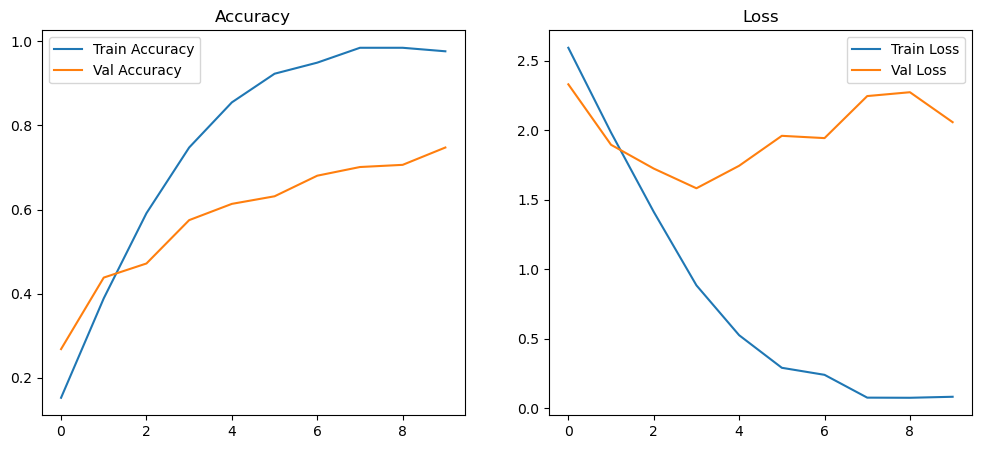

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Classification Report:

              precision    recall  f1-score   support

        Bear       0.55      0.74      0.63        23
        Bird       0.72      0.62      0.67        21
         Cat       0.60      0.60      0.60        25
         Cow       0.80      0.78      0.79        36
        Deer       0.63      0.79      0.70        34
         Dog       0.78      0.78      0.78        18
     Dolphin       0.86      1.00      0.92        24
    Elephant       0.83      0.76  

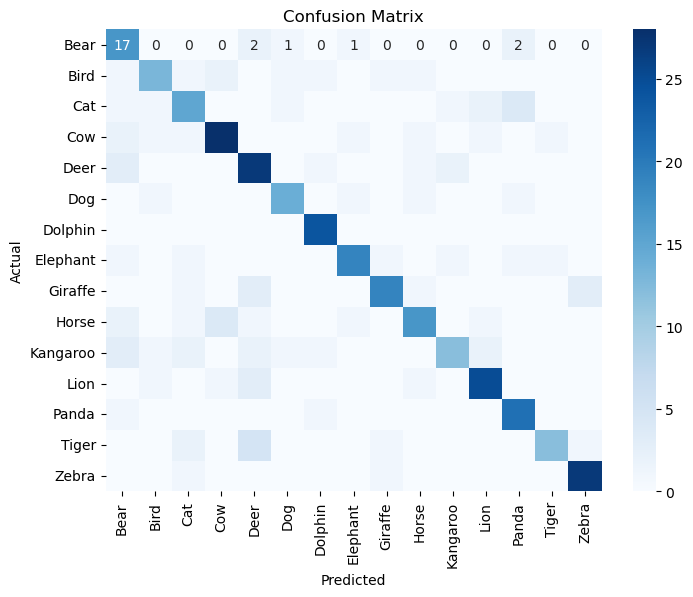

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set dataset path
dataset_path = "C:/Users/pruth/Documents/Animal_data"

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

# Get class names
class_names = train_ds.class_names
print("Classes:", class_names)

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Build CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

# Confusion matrix and classification report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
